In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import common
import timeline

In [2]:
import itertools
import numpy as np

def plot(tl: common.Timeline, y_lab: str):
    rotated = np.vstack([np.array(list(zip(itertools.repeat(idx + common.START_YEAR), tl[:, idx]))) for idx in common.YEAR_OFFSETS])
    df = pd.DataFrame({
        'Year': rotated[:, 0],
        y_lab: rotated[:, 1]
    })
    ax = sns.lineplot(df, x='Year', y=y_lab, errorbar=('pi', 95), estimator='median')
    plt.show()

Percentiles:
 5: 22.812212881717425
15: 27.016635747039984
25: 29.546720584779465
50: 34.145976487561896
75: 38.80001138967823
85: 41.31092023471386
95: 45.508816356823985


Text(0.5, 9.444444444444438, 'FLOPs Required')

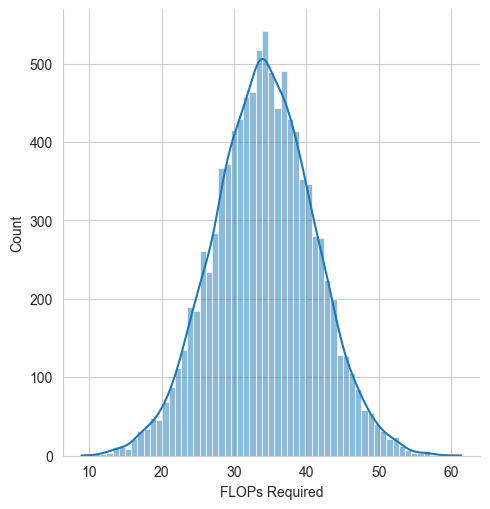

In [4]:
tai_requirements = timeline.tai_requirements()
print("Percentiles:")
for p in [5, 15, 25, 50, 75, 85, 95]:
    print(f'{p:>2}:', np.percentile(tai_requirements, p))


sns.displot(tai_requirements, kde=True)
plt.xlabel('FLOPs Required')

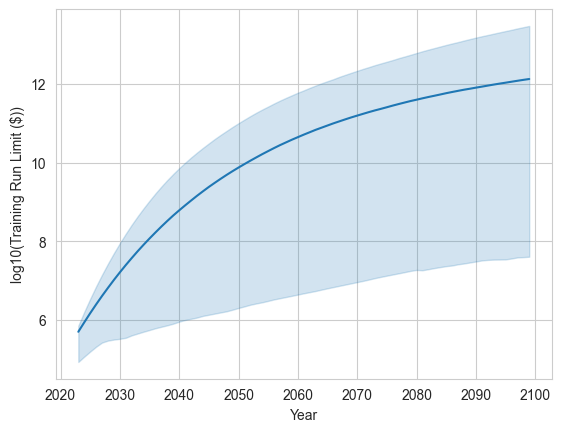

In [13]:
plot(timeline.spending(), 'log10(Training Run Limit ($))')

Percentiles:
 5: 0.0
15: 0.709264974884632
25: 1.6197292366140108
50: 3.248816411777481
75: 5.306498039205422
85: 6.481955397126349
95: 8.560513399271379


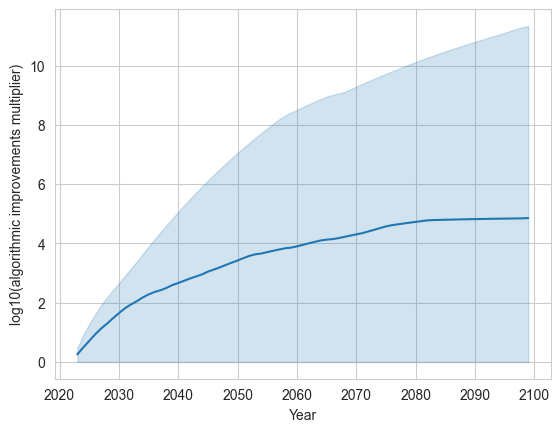

In [12]:
alg_imp_samples = timeline.algorithmic_improvements(samples=100)

print("Percentiles:")
for p in [5, 15, 25, 50, 75, 85, 95]:
    print(f'{p:>2}:', np.percentile(alg_imp_samples, p))

plot(alg_imp_samples, 'log10(algorithmic improvements multiplier)')

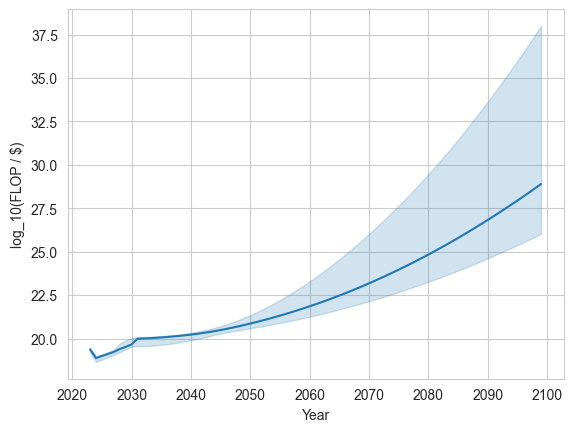

In [3]:
plot(timeline.flops_per_dollar(), 'log_10(FLOP / $)')

<Axes: xlabel='Year', ylabel='P(TAI)'>

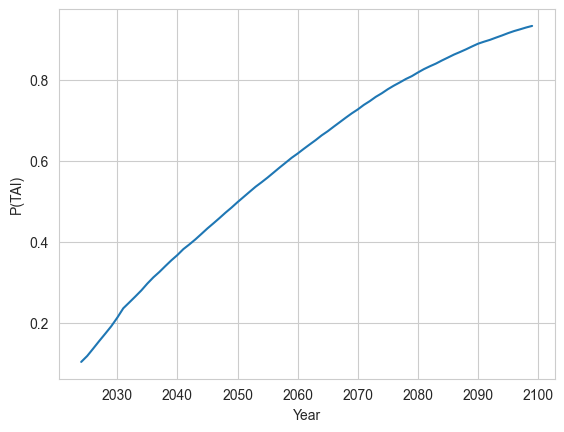

In [6]:
tl = timeline.sample_timeline(samples=10_000)

sns.lineplot(pd.DataFrame({
    'Year': np.arange(common.START_YEAR+1, common.END_YEAR),
    'P(TAI)': tl[1:],
}), x='Year', y='P(TAI)')